<a href="https://colab.research.google.com/github/diegolrs/DCT2D-Images/blob/main/DCT2D_in_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Classes and codes to manipulate image pixels**


> ## Color classes



In [1]:
 class RGB:  
  def __init__(self, r, g, b):
    self.set_r(r) 
    self.set_g(g)
    self.set_b(b)

  def __str__(self):
    return '<{}: {},{},{}>'.format(self.__class__.__name__, self.r, self.g, self.b)

  def to_array(self):
    return [self.r, self.g, self.b]

  def color_clamped(self, color):
    return max(min(color, 255), 0)

  def set_r(self, r):
    self.r = self.color_clamped(r)

  def set_g(self, g):
    self.g = self.color_clamped(g)

  def set_b(self, b):
    self.b = self.color_clamped(b)

  def set_color(self, r, g, b):
    self.set_r(r)
    self.set_g(g)
    self.set_b(b)

  def compare_color(self, other):
    if(self.r != other.r):      
      return False
    if(self.g != other.g):
      return False
    if(self.b != other.b):
      return False
    return True
  
  def get_scaled_by(self, value):
    return RGB(self.r * value, self.g * value, self.b * value)

  def get_negative(self):
    return RGB(255-self.r, 255-self.g, 255-self.b)

  def to_gray_scale(self):
    _g_color = 0.299 * self.r + 0.587 * self.g + 0.114 * self.b
    return RGB(_g_color, _g_color, _g_color)

  def to_yiq(self):
    _y = 0.2989 * self.r + 0.5870 * self.g + 0.1140 * self.b
    _i = 0.5959 * self.r - 0.2744 * self.g - 0.3216 * self.b
    _q = 0.2115 * self.r - 0.5229 * self.g + 0.3114 * self.b
    return YIQ(_y, _i, _q)

  def sum(self, other):
    _r = self.r + other.r
    _g = self.g + other.g
    _b = self.b + other.b
    return RGB(_r, _g, _b)

In [2]:
class YIQ:
    def __init__(self, y, i, q):
      self.y = y
      self.i = i
      self.q = q

    def __str__(self): 
      return '<{}: {},{},{}>'.format(self.__class__.__name__, self.y, self.i, self.q)

    def to_array(self):
      return [self.y, self.i, self.q]

    def get_negative(self):
      return YIQ(255-self.y, self.i, self.q)

    def to_gray_scale(self):
      return YIQ(self.y, self.y, self.y)

    def to_rgb(self):
      _r = self.y + 0.9563 * self.i + 0.6210 * self.q
      _g = self.y - 0.2721 * self.i - 0.6474 * self.q
      _b = self.y - 1.1070 * self.i + 1.7046 * self.q
      return RGB(_r, _g, _b)

> ## Image class



In [3]:
from matplotlib import image
from matplotlib import pyplot
import numpy as np

class Image:
    RGB = 'RGB'
    YIQ = 'YIQ'

    def __init__(self, imagedata):
      self.imagedata = imagedata
      self.m_format = RGB

    def copy(self):
      return Image(self.imagedata.copy())

    #get color in rgb format
    #note: opencv2 images are readed using [y, x], instead of [x, y]
    #note: the color was readed from opencv2 in BRG color format
    def get_color_at(self, x, y):
      m_color = self.imagedata[y, x]
      return RGB(m_color[2], m_color[1], m_color[0])

    #set color in bgr format, using a rgb
    def set_color_at(self, x, y, color_rgb):
      self.imagedata[y, x] =  [color_rgb.b, color_rgb.g, color_rgb.r]

    def display(self):
      ImageDisplayer.display(self)

    #opencv returns in format [height, width]
    def get_width(self):
      return self.imagedata.shape[1]

    def get_height(self):
      return self.imagedata.shape[0]

    def min_bounds(self):
      return [0, 0]
    
    def max_bounds(self):
      return [self.get_width(), self.get_height()]

    def invert_colors(self):
      if self.m_format == RGB:
        ImageConversor.from_rgb_to_negative(self)
      elif self.m_format == YIQ:
        ImageConversor.from_yiq_to_negative(self)

    def convert_to_yiq(self):
      if self.m_format == RGB:
        ImageConversor.from_rgb_to_yiq(self)
        self.m_format = YIQ

    def convert_to_rgb(self):
      if self.m_format == YIQ:
        ImageConversor.from_yiq_to_rgb(self)
        self.m_format = RGB

    def convert_to_gray_scale(self):
      if self.m_format == YIQ:
        ImageConversor.from_yiq_to_gray(self)
      elif self.m_format == RGB:
        ImageConversor.from_rgb_to_gray(self)

> ## Image class utils





In [4]:
#@title Image conversors

from matplotlib import image
from matplotlib import pyplot
import numpy as np

class ImageConversor:
    @staticmethod
    def from_rgb_to_yiq(image):
      m_data = np.array(
                          [
                            [RGB(k[0], k[1], k[2]).to_yiq().to_array() for k in r] 
                            for r in image.imagedata
                          ]
                        )
      image.imagedata = m_data

    @staticmethod
    def from_yiq_to_rgb(image):
      m_data = np.array(
                          [
                            [YIQ(k[0], k[1], k[2]).to_rgb().to_array() for k in r] 
                            for r in image.imagedata
                          ]
                        )
      image.imagedata = m_data

    @staticmethod
    def from_rgb_to_negative(image):
      m_data = np.array(
                          [
                            [RGB(k[0], k[1], k[2]).get_negative().to_array() for k in r] 
                            for r in image.imagedata
                          ]
                        )
      image.imagedata = m_data

    @staticmethod
    def from_yiq_to_negative(image):
      m_data = np.array(
                          [
                            [YIQ(k[0], k[1], k[2]).get_negative().to_array() for k in r] 
                            for r in image.imagedata
                          ]
                        )
      image.imagedata = m_data

    @staticmethod
    def from_rgb_to_gray(image):
      m_data = np.array(
                          [
                            [RGB(k[0], k[1], k[2]).to_gray_scale().to_array() for k in r] 
                            for r in image.imagedata
                          ]
                        )
      image.imagedata = m_data

    @staticmethod
    def from_yiq_to_gray(image):
      m_data = np.array(
                          [
                            [YIQ(k[0], k[1], k[2]).to_gray_scale().to_array() for k in r] 
                            for r in image.imagedata
                          ]
                        )
      image.imagedata = m_data

In [5]:
#@title Class to display Image objects

from matplotlib import image
from matplotlib import pyplot
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

class ImageDisplayer:
    @staticmethod
    #display a single image
    def display(img):
      cv2_imshow(img.imagedata)

    #display 2 images side by side
    @staticmethod
    def display_side(img1, img2):
      cv2_imshow(np.concatenate((img1.imagedata, img2.imagedata), axis=1))

    #display 3 images side by side
    @staticmethod
    def display_3_side(img1, img2, img3):
      cv2_imshow(np.concatenate((img1.imagedata, img2.imagedata, img3.imagedata), axis=1))

    #display 4 images side by side
    @staticmethod
    def display_4_side(img1, img2, img3, img4):
      cv2_imshow(np.concatenate((img1.imagedata, img2.imagedata, img3.imagedata, img4.imagedata), axis=1))

    #display 5 images side by side
    @staticmethod
    def display_5_side(img1, img2, img3, img4, img5):
      cv2_imshow(np.concatenate((img1.imagedata, img2.imagedata, img3.imagedata, img4.imagedata, img5.imagedata), axis=1))



---


# **DCT2D and Inverse DCT2D Implemenation**

## DCT2D Implementation

In [6]:
#@title Direct DCT1D

import math

def dct1d(x, array_length=-1):
  if array_length == -1:
    length = len(x)
  else:
    length = array_length

  m_X = [0 for j in range(length)]

  alpha = math.pow(2/length, 0.5)

  for k in range(length):
    if k == 0:
      ck = math.pow(1/2, 1/2)
    else:
      ck = 1

    _sum = 0

    for n in range(length):
      _temp = (math.pi * k) / (2*length)
      _cos = math.cos((2*n*_temp) + _temp) 
      _sum = _sum + (_cos * x[n])

    m_X[k] = alpha * ck * _sum

  return m_X

In [7]:
#@title Inverse DCT1D

import math

def inv_dct1d(X, array_length=-1):
  if array_length == -1:
    length = len(X)
  else:
    length = array_length

  m_x = [0 for j in range(length)]

  alpha = math.pow(2/length, 0.5)

  for n in range(length):
    _sum = 0

    for k in range(length):
      if k == 0:
        ck = math.pow(1/2, 1/2)
      else:
        ck = 1

      _temp = (math.pi * k) / (2*length)
      _cos = math.cos((2*n*_temp) + _temp) 
      _sum = _sum + (ck * X[k] * _cos)

    m_x[n] = alpha * _sum

  return m_x

In [8]:
#@title Direct DCT2D using separability

import math
import numpy as np

def dct2d(array2d, quant_rows, quant_columns):
  arr2d = np.array(array2d).tolist()

  #applying dct1d row by row
  for i in range(quant_rows):
    arr2d[i] = dct1d(arr2d[i])

  #applying dct1d column by column
  nArr2D = np.array(arr2d)

  for j in range(quant_columns):
    nArr2D[ :, j] = dct1d(nArr2D[ :, j])

  return nArr2D.tolist()

In [9]:
#@title Inverse DCT2D using separability

import math
import numpy as np

def inv_dct2d(array2d, quant_rows, quant_columns):
  #applying inverse dct1d column by column
  nArr2D = np.array(array2d)

  for j in range(quant_columns):
    nArr2D[ :, j] = inv_dct1d(nArr2D[ :, j])

  arr2d = nArr2D.tolist()

  #applying inverse dct1d row by row
  for i in range(quant_rows):
    arr2d[i] = inv_dct1d(arr2d[i])

  return arr2d

In [26]:
#@title Applying DCT2D on image

import numpy as np

#Used to take images to frequency domain using DCT2D
def apply_dct2d_on_image(image):
  img = image.copy()

  height = img.get_height() #rows
  width = img.get_width() #columns

  #create rgb color vectors starting with value 0 ------
  _r = [[0 for x in range(width)] for y in range(height)]
  _g = [[0 for x in range(width)] for y in range(height)]
  _b = [[0 for x in range(width)] for y in range(height)]

  # get the corresponding colors in the image -----  
  for y in range(0, height):
    for x in range(0, width):
        color = img.get_color_at(x, y).to_array()
        _r[y][x] = color[0]
        _g[y][x] = color[1]
        _b[y][x] = color[2]

 # getting the dct from the rgb color matrix of the image ------
  r_dct2 = dct2d(_r, height, width)
  g_dct2 = dct2d(_g, height, width)
  b_dct2 = dct2d(_b, height, width)

  # applying dct values ​​to the image
  for y in range(0, height):
    for x in range(0, width):
        color_dct2d = RGB(r_dct2[y][x], g_dct2[y][x], b_dct2[y][x])
        img.set_color_at(x, y, color_dct2d)

  # returns clamped image [0, 255] and the actual unclamped dct values
  return img, [r_dct2, g_dct2, b_dct2]

In [27]:
#@title Applying Inverse DCT2D on image

import numpy as np

# Used to take images from frequency domain to color space domain using inverse DCT2D
def apply_idct2d_on_image(image, dct_rgb_array):
  img = image.copy()

  height = img.get_height() #rows
  width = img.get_width() #columns

  #applying inverse dct on dct rgb matrix values passed as parameter ------
  r_dct2 = inv_dct2d(dct_rgb_array[0], height, width)
  g_dct2 = inv_dct2d(dct_rgb_array[1], height, width)
  b_dct2 = inv_dct2d(dct_rgb_array[2], height, width)

  # applying inversed dct values ​​to the image
  for y in range(0, height):
    for x in range(0, width):
        color_dct2d = RGB(r_dct2[y][x], g_dct2[y][x], b_dct2[y][x])
        img.set_color_at(x, y, color_dct2d)

  # returns clamped image [0, 255] and the actual unclamped inverse dct values
  return img, [r_dct2, g_dct2, b_dct2]



---


# **Applying DCT2D code in images**

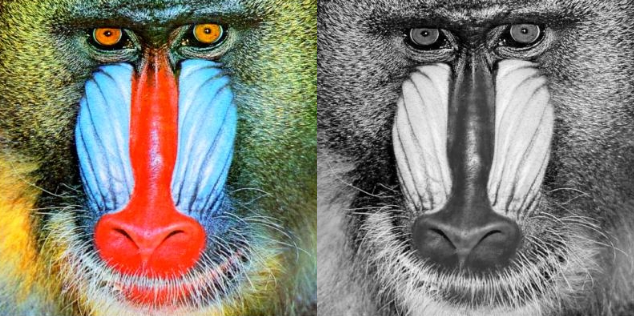

In [16]:
_image = Image(cv2.imread("image.png"))
_gray_image = Image(cv2.imread("image.png"))
_gray_image.convert_to_gray_scale()
ImageDisplayer.display_side(_image, _gray_image)

DC Level of original image
DC level of R-band44030.4435690411
DC level of G-band 41075.91539565727
DC level of B-band 34142.28904999931
DC Level of gray sacaled image
DC level of R-band39339.57733007132
DC level of G-band 39339.57733007132
DC level of B-band 39339.57733007132


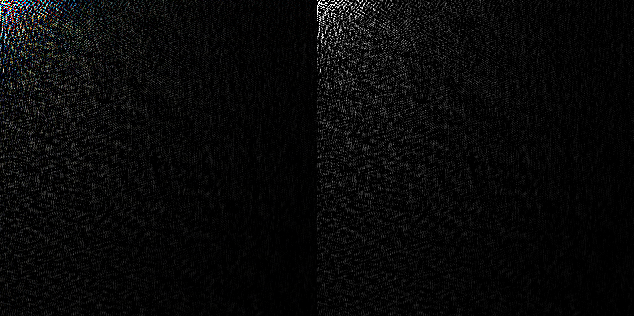

In [17]:
_image_freq_domain, dct_rgb = apply_dct2d_on_image(_image)
_gray_image_freq_domain, gray_dct_rgb = apply_dct2d_on_image(_gray_image)

# Original image -----
print('DC Level of original image')
print('DC level of R-band' + str(dct_rgb[0][0][0]))
print('DC level of G-band ' + str(dct_rgb[1][0][0]))
print('DC level of B-band ' + str(dct_rgb[2][0][0]))

# Gray sacaled image -----
print('DC Level of gray sacaled image')
print('DC level of R-band' + str(gray_dct_rgb[0][0][0]))
print('DC level of G-band ' + str(gray_dct_rgb[1][0][0]))
print('DC level of B-band ' + str(gray_dct_rgb[2][0][0]))

ImageDisplayer.display_side(_image_freq_domain, _gray_image_freq_domain)

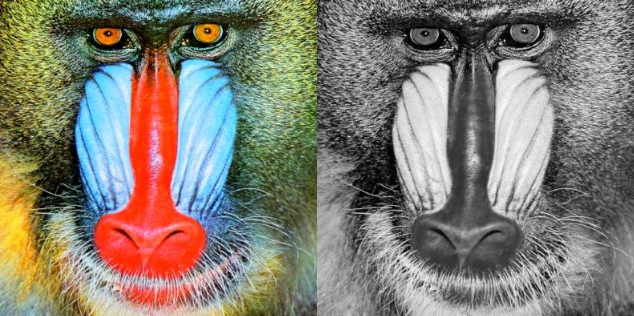

In [19]:
_image_space_domain, inv_dct_rgb = apply_idct2d_on_image(_image_freq_domain, dct_rgb)
_gray_image_space_domain, gray_inv_dct_rgb = apply_idct2d_on_image(_gray_image_freq_domain, gray_dct_rgb)

ImageDisplayer.display_side(_image_space_domain, _gray_image_space_domain)